In [89]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

We are looking for gamma-ray sources and we are given here that the background cosimic rays have a poisson distribution. In the following section, you will see how the background distribution changes as I vary the number of days I integrate the background distribution. I will integrate for 5, 50 and 200 days.

To set up the distribution, I am using x = 3 as the average number of cosimic rays emitted by the source in a day.

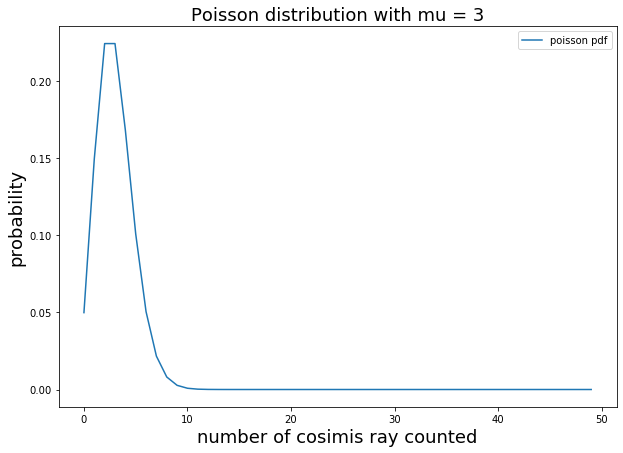

In [90]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
x = range(0,50)
mu = 3
prob = stats.poisson.pmf(x, mu) 
ax.plot(x,prob, label='poisson pdf')
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18)
plt.legend()
plt.title("Poisson distribution with mu = 3", fontsize=18)
plt.show()

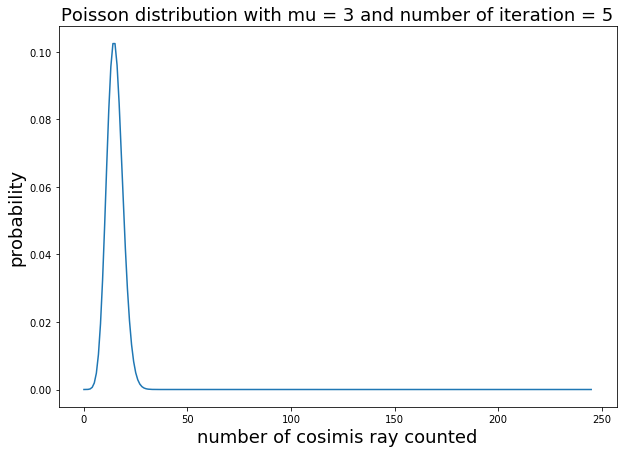

In [91]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
d1 = stats.poisson.pmf(x, mu)
d2 = stats.poisson.pmf(x, mu)

n = 5
for i in range(1, n):
    
    dist_5 = np.convolve(d1,d2)
    d1 =  dist_5

ax.plot(dist_5);
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18);
plt.title("Poisson distribution with mu = 3 and number of iteration = 5", fontsize=18)
plt.show()

Here you can see that even after integrating the distribution for 5 days, the distribution is still a poisson distribution. This is the unique property of the poisson distribution. The more numbers we convolve the higher the mean value of the final distribution. This is because as we convolve the two distribution we are ultimately summing the two independent random variables from the two distributions so the mean value increases.

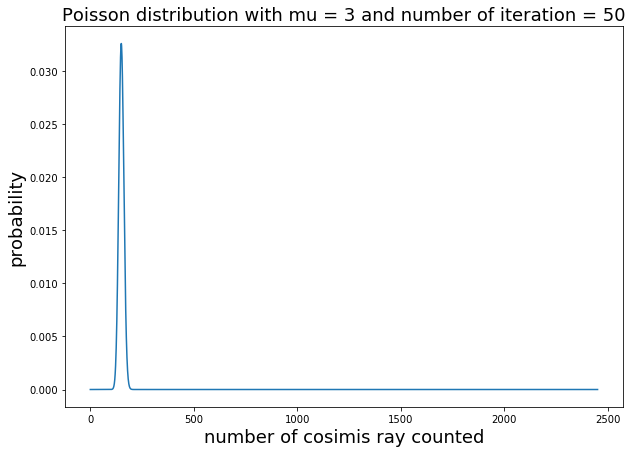

In [92]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
d1 = stats.poisson.pmf(x, mu)

n = 50
for i in range(1, n):
    
    dist_50 = np.convolve(d1,d2)
    d1 =  dist_50

plt.plot(dist_50);
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18);
plt.title("Poisson distribution with mu = 3 and number of iteration = 50", fontsize=18)
plt.show()

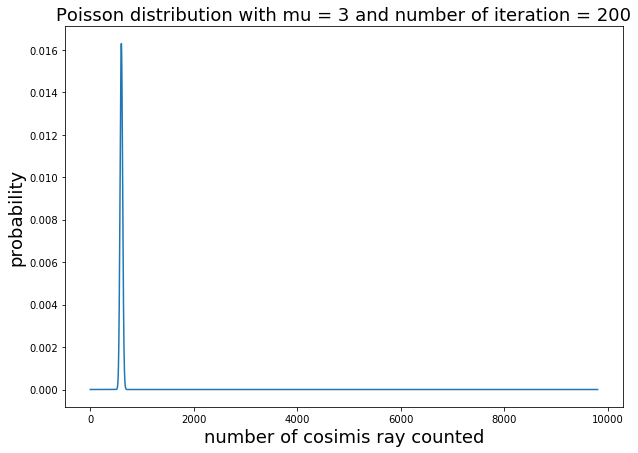

In [93]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
d1 = stats.poisson.pmf(x, mu)
n = 200
for i in range(1, n):
    
    dist_200 = np.convolve(d1,d2)
    d1 =  dist_200

ax.plot(dist_200);
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18);
plt.title("Poisson distribution with mu = 3 and number of iteration = 200", fontsize=18)
plt.show()

Following three plots are the probability distribution of average days corresponding to the sum distribution integrated for 5 days, 50 days and 200 days. The width of the peak narrows as more days are integrated. And the distribution starts to look more symmetric like a Gaussian distribution. According to the central limit theorem, the more number of samples we add the distriubtion will tend to Gaussian. This also applys to the poisson distribution. If I increase the number of convolution high enough to distribution will take on a shape that is Gaussian distribution.

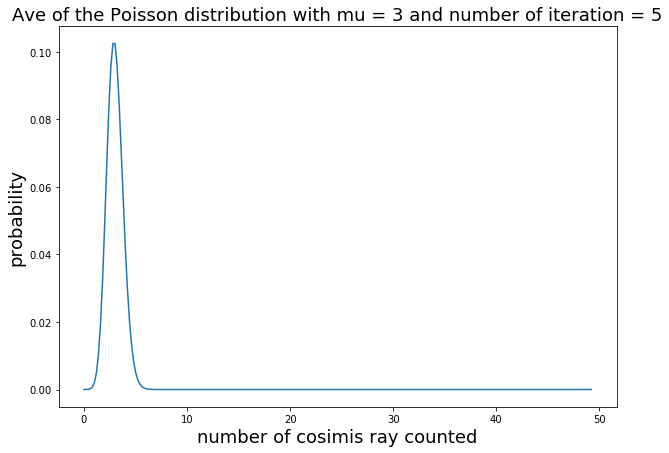

In [94]:
n = 5
left = 0
right = dist_5.size
cx = np.linspace(left, right, dist_5.size)
ave_x = cx/n

plt.plot(ave_x, dist_5);
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18);
plt.title("Ave of the Poisson distribution with mu = 3 and number of iteration = 5", fontsize=18)
plt.show();

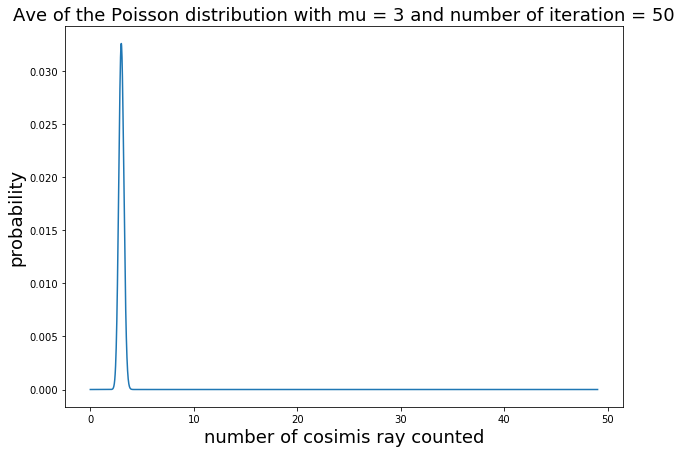

In [95]:
n = 50
left = 0
right = dist_50.size
cx = np.linspace(left, right, dist_50.size)
ave_x = cx/n

plt.plot(ave_x, dist_50);
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18);
plt.title("Ave of the Poisson distribution with mu = 3 and number of iteration = 50", fontsize=18)
plt.show();

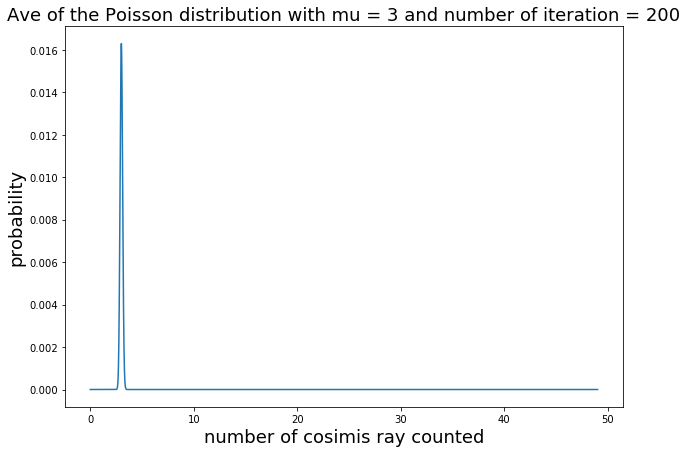

In [96]:
n = 200
left = 0
right = dist_200.size
cx = np.linspace(left, right, dist_200.size)
ave_x = cx/n

plt.plot(ave_x, dist_200);
plt.xlabel('number of cosimis ray counted', fontsize=18)
plt.ylabel('probability', fontsize=18);
plt.title("Ave of the Poisson distribution with mu = 3 and number of iteration = 200", fontsize=18)
plt.show();

Applying what I learned by studying the plot, I will use a poisson distribution to calculate the sigma for the candidate signal of NxY = 10  gamma rays from my sourse (N = 2 and Y = 5).
What I learned is that it takes a very high number of integration for the poisson distribution to tend to a Gaussian distribution. Since my number days is set at 2, it makes sense to use the poisson distribution to calculate the probability and the equivalent sigma.
 

In [97]:
 
prob = 1-stats.poisson.cdf(10,3)
print('The probability that it is more signal-like = {:.10%}'.format(prob))

sigma = stats.norm.ppf(prob)
print('sigma = {:.6f}'.format(sigma))


The probability that it is more signal-like = 0.0292336951%
sigma = -3.438626


The probability that the cosmic ray background would have given me a measurement as signal-like ore moren than the signal that I recieved is 3.42 sigma.

In the following section, you can see how Rayleigh distribution changes with more days of integration on average. The distrubtions are integrated for n = 5 and 100.


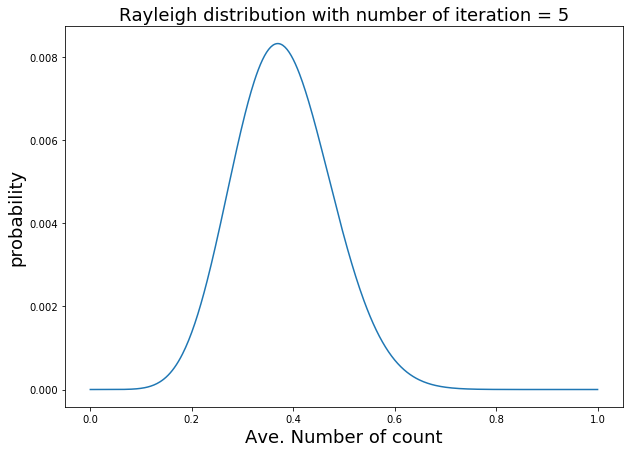

In [98]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99), 100)
d1 = stats.rayleigh.pdf(x)
d2 = stats.rayleigh.pdf(x)

n = 5
for i in range(1, n):
    
    dist_5 = np.convolve(d1,d2)
    d1 =  dist_5

dist_5 = dist_5/dist_5.sum()
#plt.plot(dist_5);
left, right = plt.xlim()
cx = np.linspace(left, right, dist_5.size)

plt.plot(cx,dist_5);
plt.xlabel('Ave. Number of count', fontsize=18)
plt.ylabel('probability', fontsize=18);
plt.title("Rayleigh distribution with number of iteration = 5", fontsize=18);

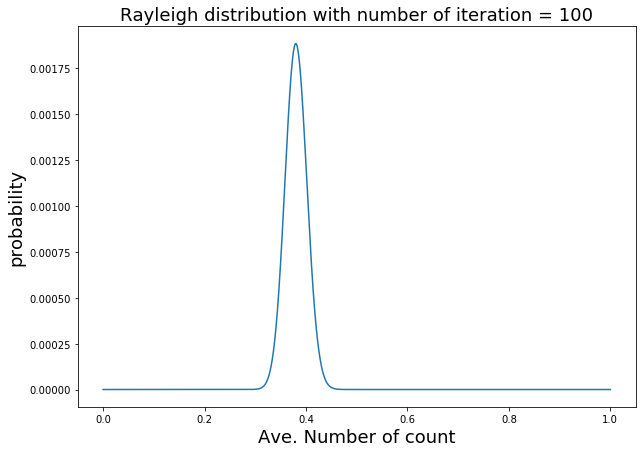

In [99]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99), 100)
d1 = stats.rayleigh.pdf(x)
d2 = stats.rayleigh.pdf(x)

n = 100
for i in range(1, n):
    
    dist_100 = np.convolve(d1,d2)
    d1 =  dist_100

dist_100 = dist_100/dist_100.sum()
#plt.plot(dist_100);
left, right = plt.xlim()
cx = np.linspace(left, right, dist_100.size)
#cx = x_sum/n

plt.plot(cx,dist_100);
plt.xlabel('Ave. Number of count', fontsize=18)
plt.ylabel('probability', fontsize=18);
plt.title("Rayleigh distribution with number of iteration = 100", fontsize=18);

You can see from the above two plots that the shape tend to Gaussian distribution even after a very small number of intervals. At n = 5, the shape starts to look a lot like a Gaussian distribution


In the following section, I am showing how a sigma value changes with a change in the candidate value of the signal when we look into only one distribution versus many more distributions. The first plot shows the distriubtion for one pixel and the second plot shows a distribution when we look into 10k pixels. We are given that the background distribution is Guassian.


The width of the Gaussian, X = 6, 
Signal strength, Y = 4.2


The probability that the background could have produced the signal = 0.2555%
sigma = -2.800


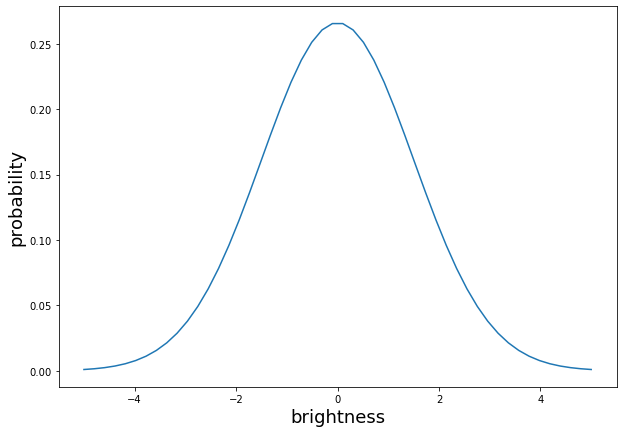

In [100]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
x = np.linspace(-5,5)
background = stats.norm.pdf(x,loc = 0, scale = 1.5)
ax.plot(x, background, label='norm pdf');
plt.xlabel('brightness', fontsize=18)
plt.ylabel('probability', fontsize=18);

signal_strength = 4.2
prob = 1-stats.norm.cdf(signal_strength,loc = 0, scale = 1.5)
print('The probability that the background could have produced the signal = {:.4%}'.format(prob))

sigma = stats.norm.ppf(prob)
print('sigma = {:.3f}'.format(sigma))
#cdf

If we have a signal free background, the probability that the background would have produced something that is more signal like than the candidate signal of 4.2 is 0.256% and has a sigma of 2.8. The sigma is not high enough to give me a confidence to call what we measured a discovery. It could have been the background.


So now, if each pixel has a Gaussian distribution, what would be the distribution if we decide to look into 10k pixels?


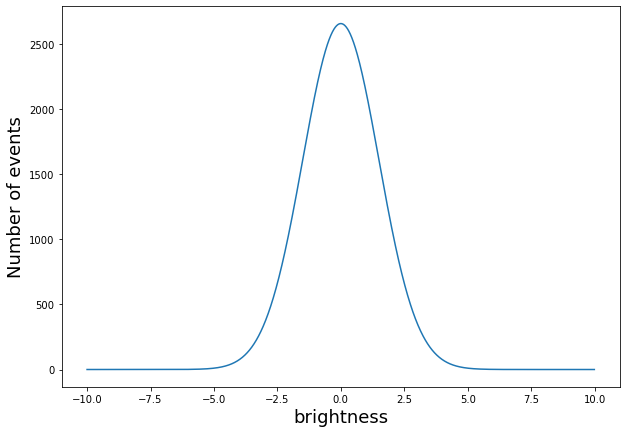

In [104]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
x = np.arange(-10, 10,0.01)
orig_norm = stats.norm.pdf(x,loc = 0, scale = 1.5)*10000

ax.plot(x, orig_norm , label='norm pdf');
plt.xlabel('brightness', fontsize=18)
plt.ylabel('Number of events', fontsize=18);

To calculate the probability for the 10K distribution, I cannot simply use the cdf() command since I have a unique distribution that I created by multiplying the Gaussian with 10,000. So to find the tail value probability from the candidate signal to positive infinity, I will sum up all number of events to the right of the sinal value and then divide it by the total number of events to get the appropriate probability.

In [105]:
# Here, I am looking for the location of 4.2 in the array that contains the x values. I can use this location to
# set the starting location of my summation for the y values.

x = np.arange(-10, 10, 0.01)
#x = np.arange(-5, 5, 0.01)
end = x.size
value = 4.2

for i in range(0, end):
    if np.isclose(x[i], 4.2, rtol=1e-03, equal_nan=False) == True:
        x_val = x[i]
        x_loc = i
     
#print(x_val)
#print(x_loc)

In [115]:
prob = 0
events =0
total_events = 0
start = 0

for i in range(x_loc, end):
    events = events + orig_norm[i]

for i in range(start, end):
    total_events = total_events + orig_norm[i]
 
prob = events/total_events
print('The probability for the candidate signal is = {:.3%}'.format(prob))
sigma = stats.norm.ppf(prob)
print('The sigma = {:.3f}'.format(sigma))

The probability for the candidate signal is = 0.258%
The sigma = -2.797


Below, I'm calculating the signal brithness necessary to qualify for discovery (5 sigma) in case i am only looking at 1 pixel. It shows that I need to have a signal brightness of 10 to have a 5 sigma.


In [116]:
prob_for_5_sigma = 1-stats.norm.cdf(5)
print('The probability for 5 sigma = {:.12%}'.format(prob_for_5_sigma))

The probability for 5 sigma = 0.000028665157%


In [117]:
# Manually found the signal required for 5 sigma

for i in np.arange(2.5570, 10, 0.0001):
    if prob > prob_for_5_sigma:
        prob = 1- stats.norm.cdf(i,loc = 0, scale = 1.5)
        #prob = stats.norm.pdf(7.86,loc = 0, scale = 1.5)
        signal = i

#for i in np.arange(2.5570, 10, 0.0001):
 #   if prob > prob_for_5_sigma:
  #      prob = stats.norm.pdf(i,loc = 0, scale = 1.5)
   #     #prob = stats.norm.pdf(7.86,loc = 0, scale = 1.5)
    #    signal = i
        
print('The probability for 5 sigma = {:.12%}'.format(prob))
print('The value of the signal for 5 sigma = {:.3f}'.format(i))

The probability for 5 sigma = 0.000028665157%
The value of the signal for 5 sigma = 10.000



Below I'm calculating the signal brithness necessary to qualify for discovery (5 sigma) in case i am only looking at 10k pixels. Unlike the 1 pixel case, I only need 7.5 brightness to be able to call it a discovery.

In [118]:
x = np.arange(-10, 10, 0.01)
end = x.size
prob = 0
events = 0
x_val = 0
x_loc = 0


for i in range(end-1, 0, -1):
   
    events = events + orig_norm[i]
    prob = events/total_events 
    if np.isclose(prob_for_5_sigma,prob, rtol=1e-6, equal_nan=False) == True:
        x_val = x[i]
        x_loc = i


print('The signal brightness for 5 sigma = {:.3f}'.format(x_val))

The signal brightness for 5 sigma = 7.500



The two analysis show that the sensitivity penalty due to a trial factor of 10k is very low. It is because the overall distribution gets lifted up by the trial factor. By changing the shape of the curve it changes the size of the probability density below the curve. This means making a little change to the candidate sinal value has a larger effect on the sigma. So in this  case, we do not have look for a sinificantly brighter signal to make a discovery compared to a distribution with a higher sensitivity penalty. So here, for the 10,000 pixel case, we need to have a signal brightness of 7.5 to have a 5 sigma whereas for the 1 pixel case we need to have a signal brightness of 10 to call it a discovery (5 sigma)

So what happens if I keep increasing the trial factors? Below I am showing a case in which I increased the trial factor to 50k pixels.

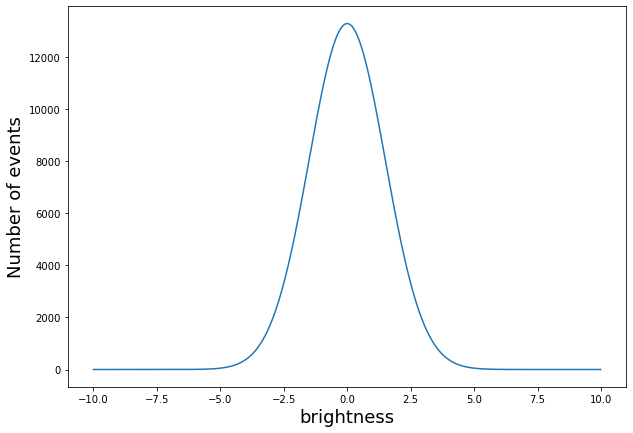

In [120]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots(1, 1)
x = np.arange(-10, 10,0.01)
orig_norm = stats.norm.pdf(x,loc = 0, scale = 1.5)*50000

ax.plot(x, orig_norm , label='norm pdf');
plt.xlabel('brightness', fontsize=18)
plt.ylabel('Number of events', fontsize=18);

In [121]:
x = np.arange(-10, 10, 0.01)
end = x.size
prob = 0
events = 0
x_val = 0
x_loc = 0


for i in range(end-1, 0, -1):
   
    events = events + orig_norm[i]
    prob = events/total_events 
    if np.isclose(prob_for_5_sigma,prob, rtol=1e-6, equal_nan=False) == True:
        x_val = x[i]
        x_loc = i

print('The signal brightness for 5 sigma = {:.3f}'.format(x_val))

The signal brightness for 5 sigma = 7.950


As I increased the trial factor from 10k to 50k, the sensitivity penalty reduced further. I needed a sinal strength of 7.5 to have 5 sigma in 10k trial case, but I only needed to increase the signal strength to 7.95 to get 5 sigma in the 50k trial case.

Extra credit: Even if the background distribution is non-Gaussian, we can conclude the same about the trial penalty for the other distribution. The effect of increasing the number of trial factor is the same for all distributions. The distribution curve gets lifted up by the number of trial factors and it changes the probability density distribution. So even if you make a small change to the candidate signal value the drop in the probability will be much bigger for the distribution with a higher trial factor. This means you will get a higher sigma value by changing the brightness of the signal a little compared to only looking into one pixel.